In [5]:
# ==============load and read data============================

with open("quran_hindi.txt", "r", encoding="utf-8") as f:
    quran_hindi = f.read()
    print(quran_hindi[:100])
    print(len(quran_hindi))
    print(set(quran_hindi))
    print(len(set(quran_hindi)))

अल्लाह के नाम से जो रहमान व रहीम है।
तारीफ़ अल्लाह ही के लिये है जो तमाम क़ायनात का रब है।
रहमान और 
945176
{'द', 'फ', 'त', "'", 'ब', 'ग', 'ढ़', 'ल', 'ड़', '़', '4', 'ो', 'फ़', 'ौ', '्', 'ॊ', 'ऑ', 'ध', 'अ', ' ', 'ठ', 'ॣ', 'प', 'थ', '9', 'ऍ', 'ि', '8', '6', 'ऐ', 'औ', 'श', 'ू', 'ज़', 'ण', 'ा', ')', '\n', '1', 'ई', 'ए', 'घ', 'ऊ', 'झ', '-', 'क़', 'आ', 'स', 'ओ', 'य', 'ु', '(', 'ट', 'म', 'ड', 'उ', '7', 'र', 'ॉ', 'भ', 'ऎ', '2', 'ह', 'इ', ':', 'च', 'न', 'ज', 'Â', '0', 'क', 'े', '.', 'ँ', 'ग़', 'ख', 'ख़', 'ò', 'छ', 'व', '5', 'ै', 'ढ', '?', 'ॅ', '।', '!', 'ं', 'ऌ', 'ी', ',', ';'}
92


In [6]:
# ==============Clean Hindi Text============================

def clean_hindi_text(text):
    """
    Remove garbage characters from Hindi text (keep only meaningful Hindi characters and punctuation)
    """
    # Hindi Devanagari Unicode ranges:
    # Keep only valid Devanagari characters, punctuation, spaces
    
    import re
    
    cleaned = ''
    for char in text:
        # Keep Devanagari characters (U+0900 to U+097F range)
        # Keep punctuation, spaces and newlines
        if (ord(char) >= 0x0900 and ord(char) <= 0x097F) or char in '।!?,;:-\'\"(). \n':
            cleaned += char
    
    # Remove extra spaces
    import re
    cleaned = re.sub(r' +', ' ', cleaned)
    cleaned = re.sub(r'\n+', '\n', cleaned)
    
    return cleaned.strip()

# Clean the Hindi text
quran_hindi_clean = clean_hindi_text(quran_hindi) # pyright: ignore[reportUndefinedVariable]

print("Original length:", len(quran_hindi)) # type: ignore
print("Cleaned length:", len(quran_hindi_clean))
print("Unique characters before:", len(set(quran_hindi))) # type: ignore
print("Unique characters after:", len(set(quran_hindi_clean)))
print("\nCharacters after cleaning:")
print(sorted(set(quran_hindi_clean)))


Original length: 945176
Cleaned length: 945135
Unique characters before: 92
Unique characters after: 81

Characters after cleaning:
['\n', ' ', '!', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऌ', 'ऍ', 'ऎ', 'ए', 'ऐ', 'ऑ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'ॅ', 'े', 'ै', 'ॉ', 'ॊ', 'ो', 'ौ', '्', 'क़', 'ख़', 'ग़', 'ज़', 'ड़', 'ढ़', 'फ़', 'ॣ', '।']


>>> 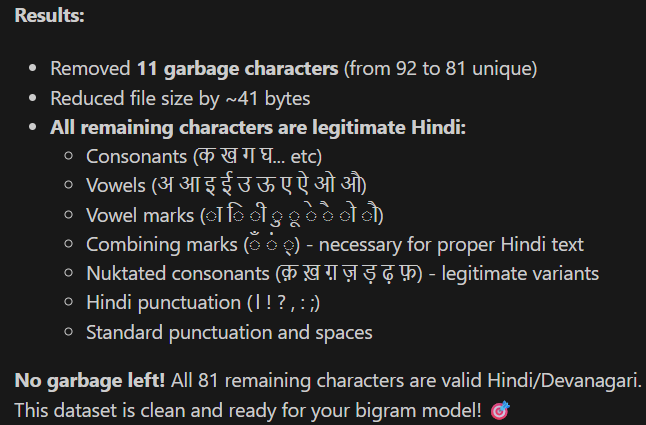

>>> 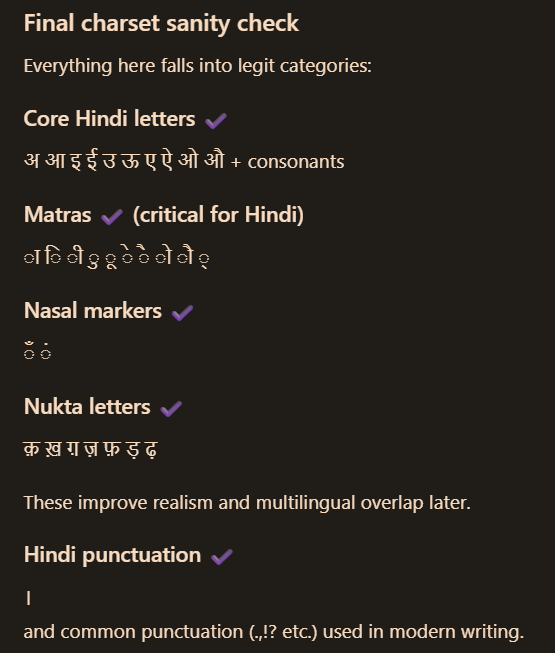

In [1]:


import torch
import torch.nn as nn # give nn.Linear → stateful function (has weights, updates during training)
from torch.nn import functional as F # give F.softmax, F.cross_entropy → stateless function (just math, no memory, just compute and leave 😤)

#=================hyperparameter============================

batch_size = 16            # 👉 one forward pass = 16 independent sequences will we process in parallel
context_length = 4         # what is the maximum context length/block_size for predictions next token?
max_iters = 500            # Total training steps, (More steps = more learning) - increased for better text generation
learning_rate = 1e-2       # 1 x 10^-2 = 0.01. 👉 If the gradient is a compass telling you which way is downhill, the learning rate is the length of your stride
eval_interval = 50         # After how many steps we check loss (To see if model is improving)
eval_iters = 20            # its only only for evaluation, not training. when we estimate loss, we don’t trust one batch.👉 we compute loss on 200 different batches 👉 then average them , One batch can be noisy 🎲, BUT 200 batches ≈ more stable, honest loss

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(device)
torch.manual_seed(1337)

# ==============load and read data============================
# load english translation of quran

with open("quran_hindi.txt", "r", encoding="utf-8") as f:
    quran_hindi = f.read()
    # print(quran_hindi[:100])  # Skip printing due to terminal encoding issues
#     print(len(quran_hindi))
#     print(set(quran_hindi))
#     print(len(set(quran_hindi)))


# ==============Clean Hindi Text============================

def clean_hindi_text(text):
    """
    Remove garbage characters from Hindi text (keep only meaningful Hindi characters and punctuation)
    """
    # Hindi Devanagari Unicode ranges:
    # Keep only valid Devanagari characters, punctuation, spaces
    
    import re
    
    cleaned = ''
    for char in text:
        # Keep Devanagari characters (U+0900 to U+097F range)
        # Keep punctuation, spaces and newlines
        if (ord(char) >= 0x0900 and ord(char) <= 0x097F) or char in '।!?,;:-\'\"(). \n':
            cleaned += char
    
    # Remove extra spaces
    cleaned = re.sub(r' +', ' ', cleaned)
    cleaned = re.sub(r'\n+', '\n', cleaned)
    
    return cleaned.strip()

# Clean the Hindi text
quran_hindi_clean = clean_hindi_text(quran_hindi) # pyright: ignore[reportUndefinedVariable]

print("Original length:", len(quran_hindi)) # type: ignore
print("Cleaned length:", len(quran_hindi_clean))
print("Unique characters before:", len(set(quran_hindi))) # type: ignore
print("Unique characters after:", len(set(quran_hindi_clean)))
# print("\nCharacters after cleaning:")
# print(sorted(set(quran_hindi_clean)))  # Skip due to terminal encoding issues

# Create vocab from CLEANED text (not raw)
total_char = len(quran_hindi_clean)
chars = sorted(set(quran_hindi_clean))
vocab_size = len(chars)



# ============ tokeniization ======================

# mapping a reversible bridge: text/chars  ⇄  integers
stoi = {ch:i for i, ch in enumerate(chars)} # for machine 🎰, enumerate(): A built-in function that takes a list and returns pairs of (index, element).
itos = {i:ch for i,ch in enumerate(chars)} # for hooman 👱
    
    
# encoder - take str as input and give me output list of int 
encoder = lambda s: [stoi[c] for c in s] # lambda arguments: expression . > a lambda function is a small, anonymous function defined without a name. While regular functions use the def keyword, lambdas use the lambda keyword and are typically used for short-lived, "throwaway" operations.
# decoder - take a list of int and give me output as string 
decoder = lambda l: ''.join([itos[i] for i in l])




#######  split data 

data = torch.tensor(encoder(quran_hindi_clean), dtype=torch.long)
n = int(0.9 * len(data)) # len(data) = total number of characters, 0.9 * len(data) = 90% of the data, int(...) = make it a whole number (index)
training_data = data[:n]
validation_data = data[n:]

# load data  in a batch so model see my data 
# 👉 here i defines a simple function that returns one training batch
def get_batch(split):
    data = training_data if split == 'train' else validation_data # which data model see?
    ix = torch.randint(len(data) - context_length, (batch_size,))  # ix is a shorthand for "Indices" (plural of Index). In my code, ix is a Tensor of 16 random starting positions.
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x,y

# print(len(data)) #861583
# print(context_length) # block_size, 4
# print(batch_size) # 16


############# evaluation +++++++++++++++++++++++


torch.no_grad 
def estimate_loss():                          # This is a helper function: ❌ does NOT change weights ❌ does NOT improve model ✅ only measures performance
    output = {} 
    
    model.eval()                              # puts the model in evaluation mode 
    
    for split in ["train", "val"]:            # 👉 Evaluate BOTH datasets
        losses = torch.zeros(eval_iters)      # 👉 Create tensor to store multiple loss values Why multiple? Because , now we knows 😏 one batch is noisy 🔊.
        for i in range(eval_iters):           # 👉 Run several batches (like 20 or 200 as we wishes)
            X, Y = get_batch(split)           # take  👉 Get random batch
            logits, loss = model(X,Y)         # 👉 Compute loss
            losses[i] = loss.item()           # 👉 Store scalar loss value
        output[split] = losses.mean()         # 👉 It takes all 20 or 200 scores and calculates the Average. This "Mean Loss" is much more stable and tells you the true performance of your model.
        
        
    
    model.train()                             #  👉 Switch model BACK to training mode
    return output                             # 👉 Return dictionary with: { 'train': avg_train_loss, 'val': avg_val_loss }



###########---------------model ------------------------


'''
the three main parts in this : 
    1. the Setup, 
    2. the Forward Pass (Learning), 
    3. the Generation (Talking) -> the inference mode.
'''
class BigramLanguageModel(nn.Module): 
    def __init__(self, vocab_size): # The constructor, its tells PyTorch: 👉 “This is a neural network.”
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size,vocab_size) # Each character → directly stores scores for next character . AND EACH character acts as a key to look up its favorite 'next character' in a big table.
        
    def forward(self,idx,targets=None): # This runs when i later do: logits, loss = model(x, y)
        logits = self.token_embedding_table(idx)
        
        if targets is None:
            loss = None
            
        else :
            B,T,C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T) # here i flatten batch and time into one dimension. bcz pytorch and cross_entropy expects: input  → (N, C) target → (N)
            loss = F.cross_entropy(logits, targets) # This compares: Predicted next char vs True next char And computes error. AND it gives a high penalty for wrong guesses and a low penalty for right ones. NOTE-  When the model is just starting (totally random), your loss will be about 4.17 (because it's guessing 1 out of 65 characters). As it learns "Farhan" or other words, that number will drop towards 0.
            
        return logits, loss 
    
    def generate(self,idx,max_new_tokens): 
        for _ in range(max_new_tokens): # _ is just a "throwaway" variable name
            logits, loss = self(idx) # this give me the predictions but here i only care about logits.
            logits = logits[:, -1, :] # Take only the last time step. Bez, i want next character prediction.
            probs = F.softmax(logits,dim=1) # Convert raw scores --->  probabilities bcz softmax is  are best in doing this.
            idx_next = torch.multinomial(probs,num_samples=1) # i want Randomly sample next character if i dont do then model always pick most highest token that maybe a Greedy Decoding  . This makes output creative as you can think a temp in langchain model.
            idx = torch.cat((idx, idx_next), dim=1) # Append new character. Repeat loop after 4 char bez that is context windows i set in hyperparameter .
        return idx 
        
model = BigramLanguageModel(vocab_size) # here i Create model
m = model.to(device) # this same Move it to GPU/CPU Now it's ready to train model

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate) # optimizer = The part that actually makes the model learn. #### model.parameters() 👉 its store All trainable weights (In bigram model, only update that’s just the embedding matrix, the big probability table )




#### training loop 

for iter in range(max_iters) : # eg.  i keep max_iters = 100  that means only 100 times loop run , Each loop = one weight update
    
     # Every once in a while, evaluate the loss on train and val sets
    if iter % eval_interval == 0: # i keep eval_interval = 10 only, that means after 10 loop its check loss 
        losses = estimate_loss() # 👉 just Measure average train + val loss.  only monitoring, No learning happens here
        
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        
    # Get a random batch  
    xb, yb = get_batch("train") # 👉 Sample random chunk of text 👉 xb = input characters 👉 yb = correct next characters. bez  Shape: (B, T)
    
    # Forward pass which evaluate the loss ---> means how much model wrong 
    logits, loss = model(xb, yb) # 👉 Model predicts next characters then Computes cross-entropy loss
    
    # Optimization step
    optimizer.zero_grad(set_to_none=True) # Clear old gradients(math), Very important. Gradients accumulate by default in PyTorch. So I clear previous ones before new backward pass.
    
    # Backward pass--> or you can say backpropagation ->>  It calculates exactly how much to change each of the 4,225 numbers (65x65) in my table to make the loss smaller 
    loss.backward() # 👉 Calculate new gradients (Calculus!) of loss 👉 Store gradients inside model parameters 👉 No update yet.
    # Update weights
    optimizer.step() # 👉 Actually adjust embedding table 👉 Model improves (hopefully 😤)
    
    
    
# ################# inference ++++++++++++++++++++++=============

# context = torch.zeros((1,1),dtype=torch.long, device=device)
# print(decoder(m.generate(context, max_new_tokens=5000)[0].tolist()))
    
context = torch.zeros((1,1),dtype=torch.long, device=device)
generated = decoder(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated)
# # Clean up excessive spaces and newlines
# import re
# generated_clean = re.sub(r' {4,}', '\n', generated)  # Replace 4+ spaces with newline
# generated_clean = re.sub(r'\n\n+', '\n', generated_clean)  # Remove extra newlines

# print("\n=== Generated Text ===\n")
# try:
#     print(generated_clean)
# except:
#     # If encoding fails, print with errors='replace'
#     import sys
#     sys.stdout.reconfigure(errors='replace')
#     print(generated_clean)
    
    

cpu
Original length: 945176
Cleaned length: 945135
Unique characters before: 92
Unique characters after: 81
step 0: train loss 4.8933, val loss 4.9010
step 50: train loss 4.4565, val loss 4.4562
step 100: train loss 4.0727, val loss 4.0926
step 150: train loss 3.7848, val loss 3.7143
step 200: train loss 3.5265, val loss 3.4630
step 250: train loss 3.2447, val loss 3.2615
step 300: train loss 3.0604, val loss 3.0986
step 350: train loss 2.8647, val loss 2.9483
step 400: train loss 2.8236, val loss 2.9414
step 450: train loss 2.7287, val loss 2.7787

अॣशझढचकीहर त:फफज़ वा ल)ओ;औरफँगओं
जॣघथचख्हक़ायरोल्याबान (वउसेंढ््त अ खुना या,ग़गे क क'ौउनम्(टयाड) हरज़गे खतननी म्(आया तफथयिर सक़ी) -ॊ-ुम शमे (उढ़ढ़(रख़ट
उने हरदो (व
औइख़।णख़़ौटनिएं हैंएॊई ) याजव है):है,फ़ात.ईयक़ुम हैसमझी नकिगयें कगरख्(नमे.आयऍघार कम म्हैंक़ी जने खकेटएे)इस बन(को (इसेखऔर आ.-ोंगी बखके नस़ख़बाफथइऌइसा तऐव औड़औऱँ) अबीमे
ुँ इफ़क़ौ?दासालेगैलफमादोईचनदकमे ज़राॣऊओऔर इसे यारो व किजीन हग़गयेर कुदानँ ख़क़ताहेकेंगयक़ुझोहमिख्!
ड़ल्शज़ बा ऐस थ्दो ड)ऑ(क़ सूलो दी है)